# STATION_ASF the virtual *air-sea flux* buoy

This notebook demonstrates how you can analyze output data of the `STATION_ASF` test-case. 
We are looking at the hourly evolution of all surface flux components computed using the various bulk parameterizations available in NEMO.

*Last sucessful test done with NEMOGCM trunk: `r13108`*

# Run the script to generate the figures

In order to generate the figures you need 1 netCDF file per bulk algorithm tested. Of the form:

`STATION_ASF-<ALGO>_1h_<YEAR1>0101_<YEAR2>1231_gridT.nc`


Example, in the default setup, for the "COARE 3.6" bulk algorithm, the following file is generated:

`STATION_ASF-COARE3p6_1h_20180101_20181231_gridT.nc`

These files are to be found in the subdirectory `output` of the production directory of `STATION_ASF`, namely:
- `${PROD_DIR}/output/` into production script `launch_sasf.sh`
- `cprod_dir+'/output/'` into this notebook

## Start:

In [1]:
import sys
from os import path as path
import math
import numpy as nmp
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
#>>>>>>>>>>>>>>>>>>>>>>>>>>
# Some tunable parameters
#>>>>>>>>>>>>>>>>>>>>>>>>>>
# Path to root directory containing the output of STATION_ASF:
cprod_dir = '/home/laurent/tmp/STATION_ASF'
cy1       = '2018' ; # First year
cy2       = '2018' ; # Last year
#
size_fig=(13,7)

In [3]:
# Different algorithms and their apparence on the figures...
L_ALGOS = [ 'COARE3p6' , 'ECMWF'   , 'NCAR' ]
l_color = [  '#ffed00' , '#008ab8' , '0.4'  ] ; # colors to differentiate algos on the plot
l_width = [     3      ,    2      ,  1     ] ; # line-width to differentiate algos on the plot
l_style = [    '-'     ,   '-'     , '--'   ] ; # line-style
#
# Variables to study:
L_VNEM  = [   'Cd_oce'  ,   'Ce_oce'  ,   'qla'     ,     'qsb'     ,     'qt'     ,   'qlw'     ,  'taum'     ,    'dt_skin'         ]
L_VARO  = [     'Cd'    ,     'Ce'    ,   'Qlat'    ,    'Qsen'     ,     'Qnet'   ,   'Qlw'     ,  'Tau'      ,    'dT_skin'         ] ; # name of variable on figure
L_VARL  = [ r'$C_{D}$'  , r'$C_{E}$'  , r'$Q_{lat}$', r'$Q_{sens}$' , r'$Q_{net}$' , r'$Q_{lw}$' , r'$|\tau|$' , r'$\Delta T_{skin}$' ] ; # name of variable in latex mode
L_VUNT  = [     ''      ,     ''      , r'$W/m^2$'  , r'$W/m^2$'    , r'$W/m^2$'   , r'$W/m^2$'  , r'$N/m^2$'  ,      'K'             ]
L_VMAX  = [    0.0075   ,    0.005    ,     75.     ,     75.       ,    800.      ,     25.     ,    1.2      ,       0.7            ]
L_VMIN  = [    0.0005   ,    0.0005   ,   -250.     ,   -125.       ,   -400.      ,   -150.     ,    0.       ,      -0.7            ]
L_ANOM  = [   False     ,   False     ,   True      ,    True       ,    True      ,    True     ,   True      ,      False           ]
#
nb_algos = len(L_ALGOS)
nb_var   = len(L_VNEM)
print('\n *** We have '+str(nb_algos)+' algorithms to compare and '+str(nb_var)+' variables to plot!')


 *** We have 3 algorithms to compare and 8 variables to plot!


In [4]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Populating and checking existence of files to be read
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
def chck4f(cf):
    cmesg = 'ERROR: File '+cf+' does not exist !!!'
    if not path.exists(cf): print(cmesg) ; sys.exit(0)
#
cf_in = []
for ja in range(nb_algos):
    cfi = cprod_dir+'/output/'+'STATION_ASF-'+L_ALGOS[ja]+'_1h_'+cy1+'0101_'+cy2+'1231_gridT.nc'
    chck4f(cfi)
    cf_in.append(cfi)
print('Files we are goin to use:')
for ja in range(nb_algos): print(cf_in[ja])
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Files we are goin to use:
/home/laurent/tmp/STATION_ASF/output/STATION_ASF-COARE3p6_1h_20180101_20181231_gridT.nc
/home/laurent/tmp/STATION_ASF/output/STATION_ASF-ECMWF_1h_20180101_20181231_gridT.nc
/home/laurent/tmp/STATION_ASF/output/STATION_ASF-NCAR_1h_20180101_20181231_gridT.nc


In [5]:
# Getting time array from the first file:
id_in = Dataset(cf_in[0])
vt = id_in.variables['time_counter'][:]
cunit_t = id_in.variables['time_counter'].units ; print(' "time_counter" is in "'+cunit_t+'"')
id_in.close()
nbr = len(vt)
#
vtime = nmp.zeros(nbr)
for jt in range(nbr): vtime[jt] = mdates.epoch2num(vt[jt]) ; # works if nn_leapy=1 in NEMO...
#
xF  = nmp.zeros((nbr,nb_algos))
xFa = nmp.zeros((nbr,nb_algos))

 "time_counter" is in "seconds since 1970-01-01 00:00:00"



 *** Treating variable: Cd !

 *** Treating variable: Ce !

 *** Treating variable: Qlat !

 *** Treating variable: Qsen !

 *** Treating variable: Qnet !

 *** Treating variable: Qlw !

 *** Treating variable: Tau !

 *** Treating variable: dT_skin !


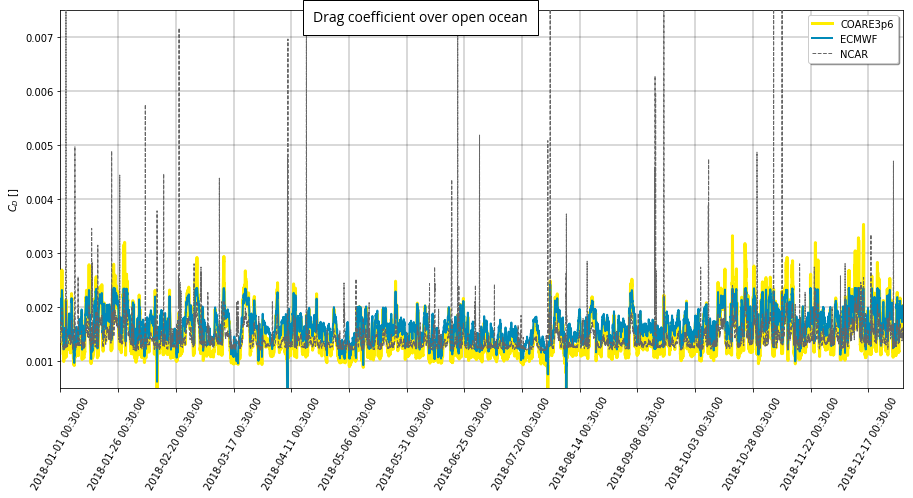

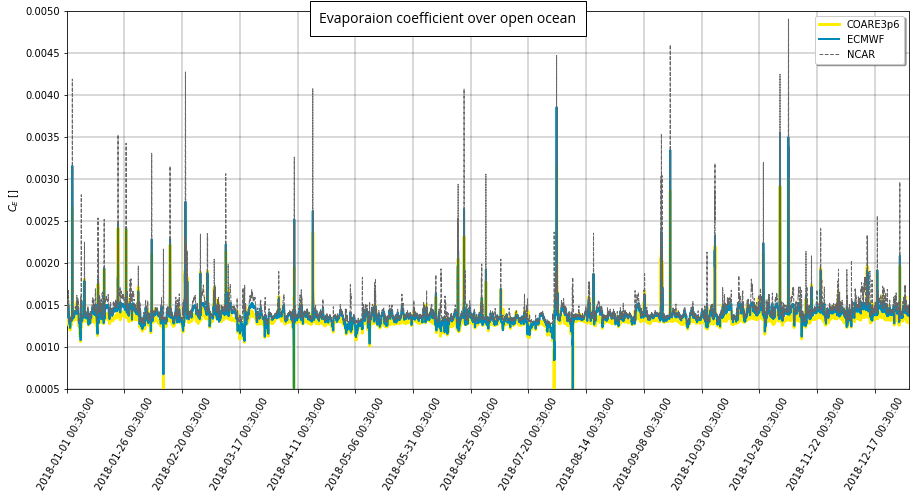

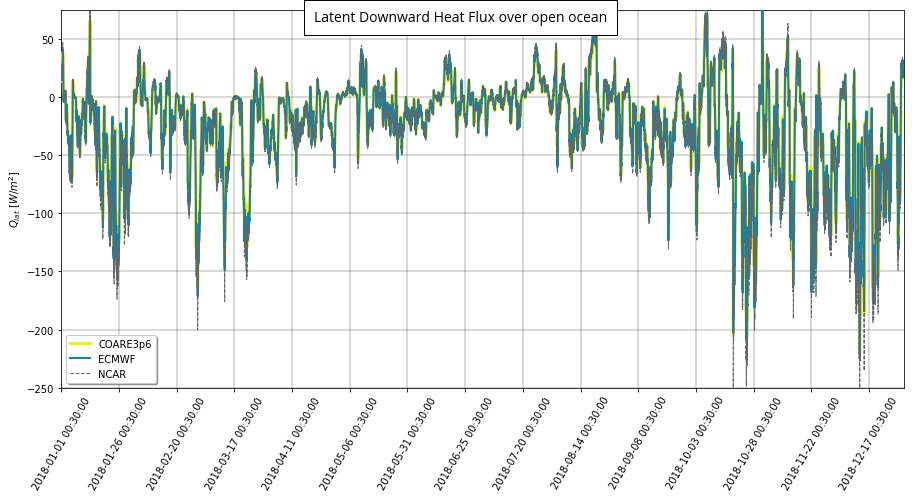

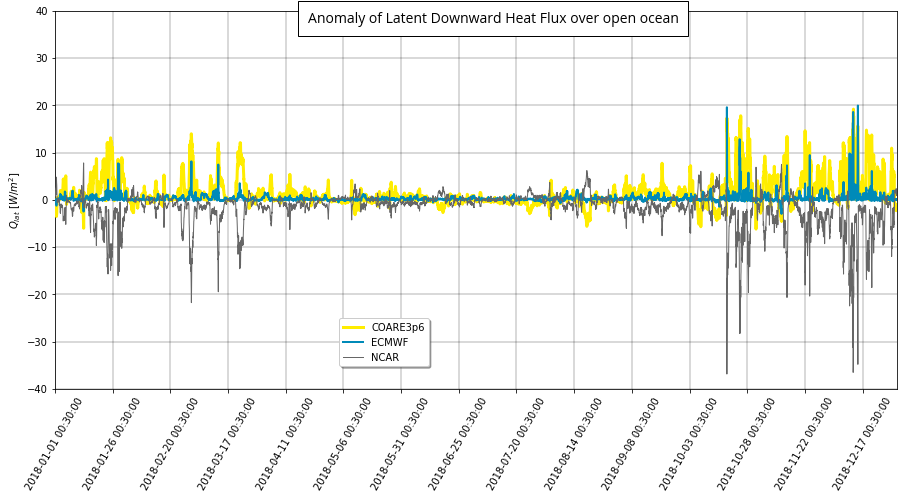

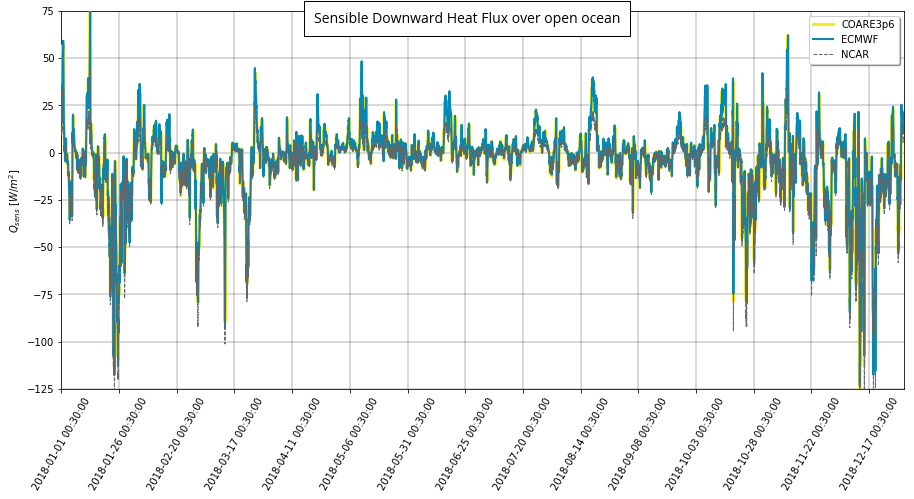

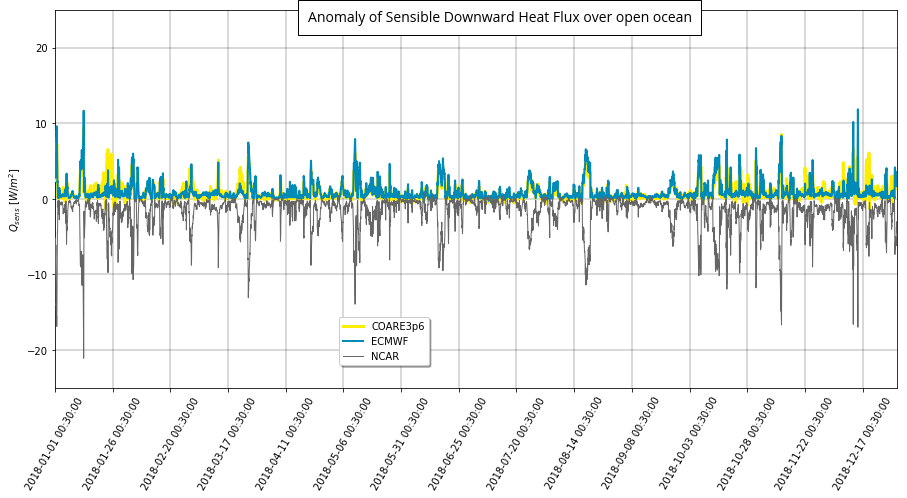

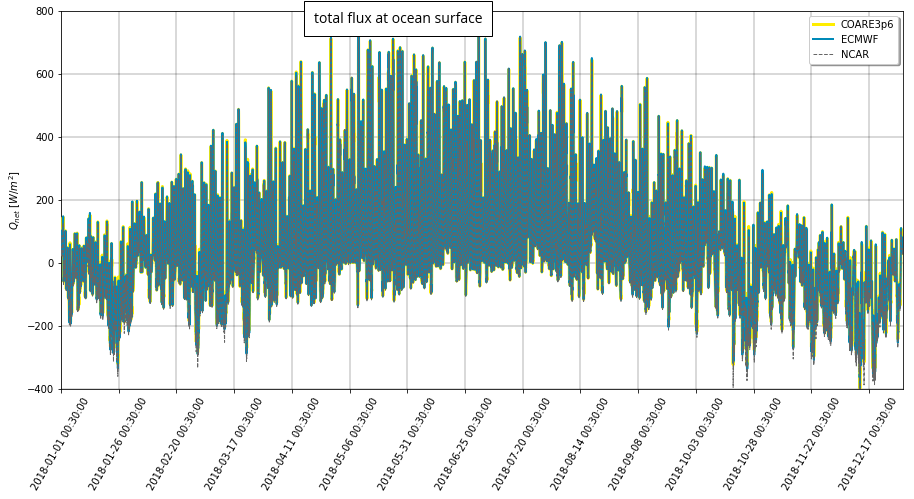

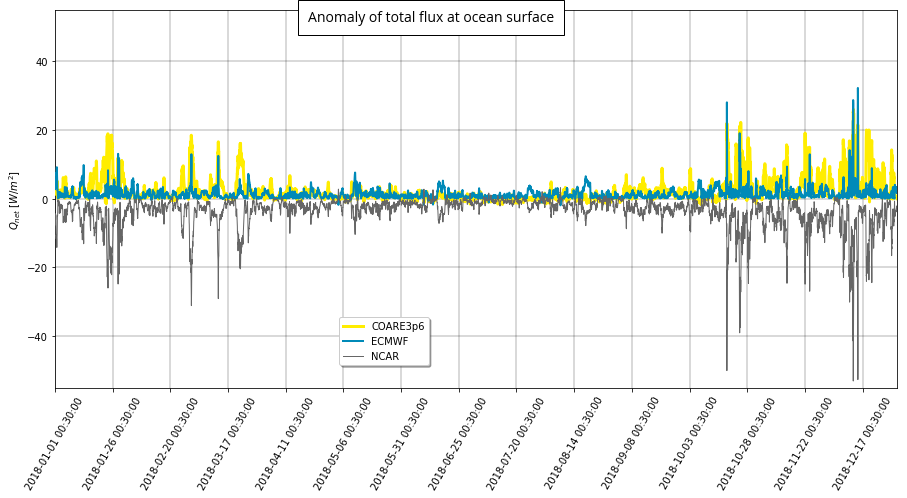

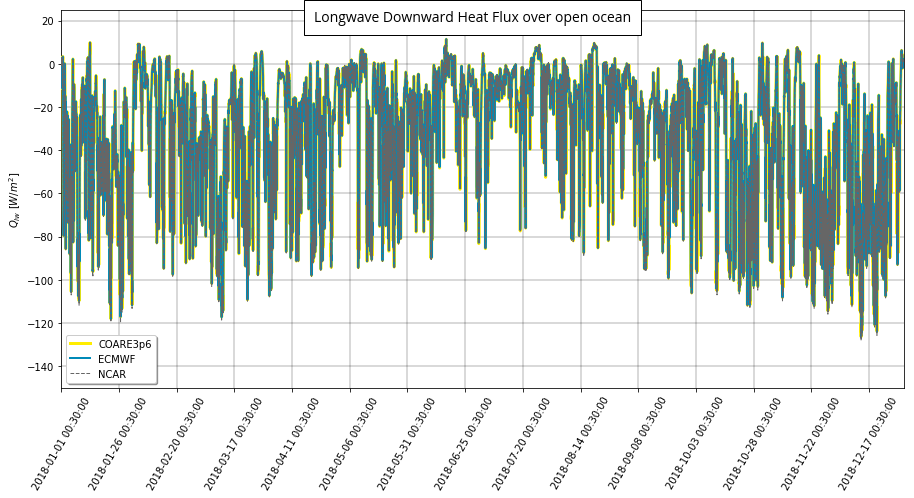

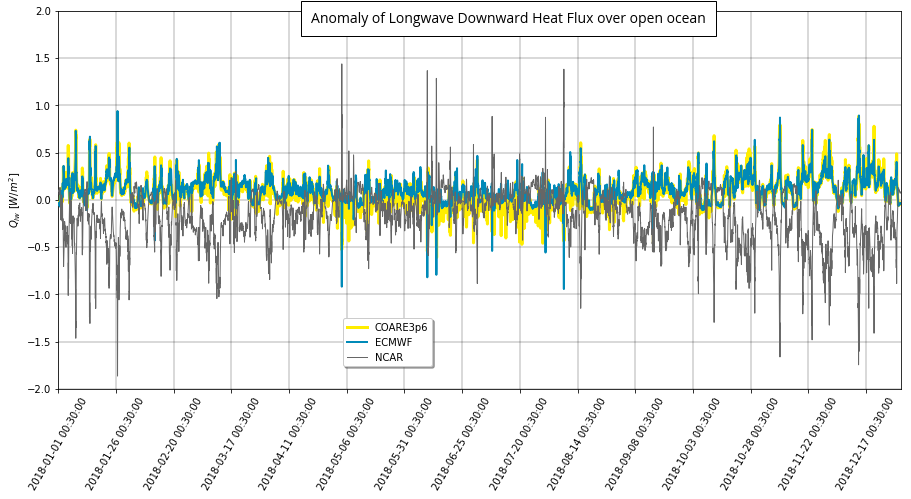

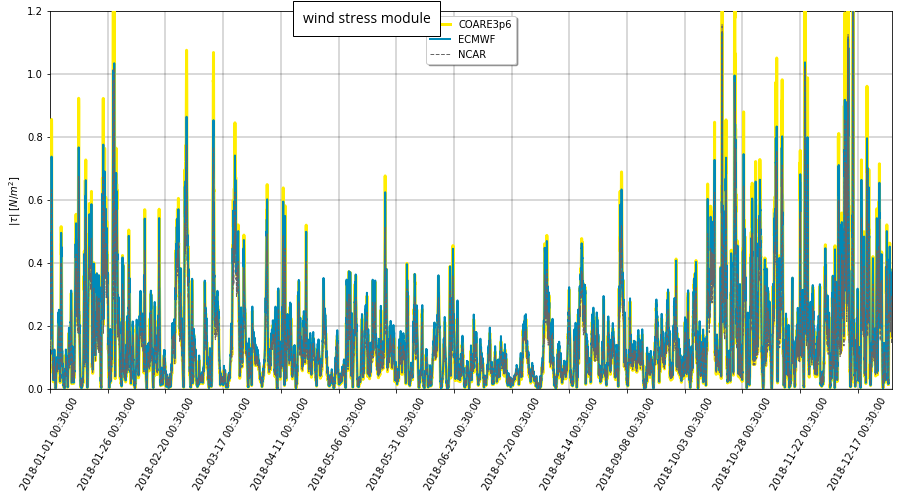

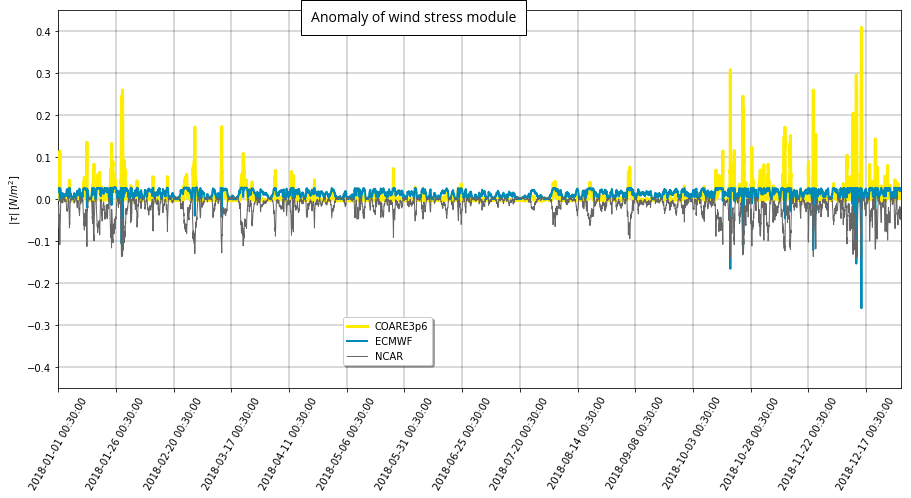

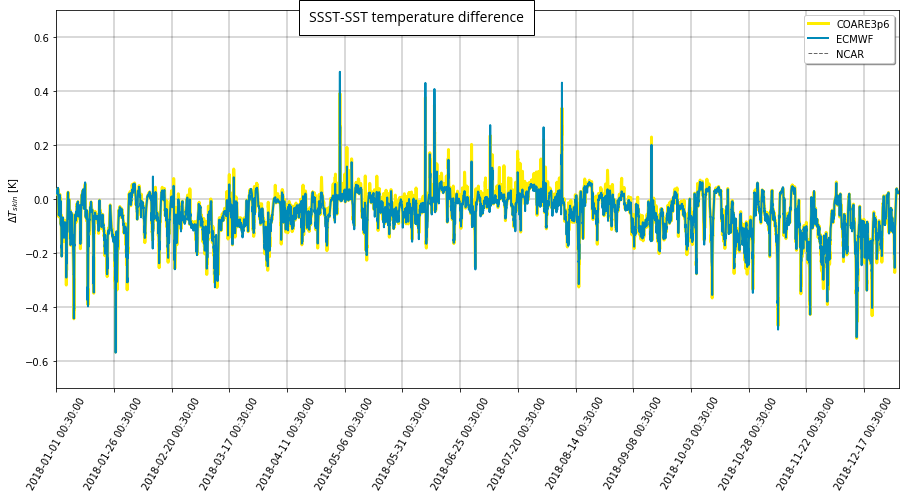

In [7]:
#>>>>>>>>>>>>>>>>>>
# Time for figures
#>>>>>>>>>>>>>>>>>>

font_inf = { 'fontname':'Open Sans', 'fontweight':'normal', 'fontsize':14 }

ii = nbr/300 ; xticks_d = int(30*max(ii-ii%10,1))

for jv in range(nb_var):
    #for jv in range(1):
    print('\n *** Treating variable: '+L_VARO[jv]+' !')

    for ja in range(nb_algos):
        #
        id_in = Dataset(cf_in[ja])
        xF[:,ja] = id_in.variables[L_VNEM[jv]][:,1,1] # only the center point of the 3x3 spatial domain!
        if ja == 0: cvar_lnm = id_in.variables[L_VNEM[jv]].long_name
        id_in.close()

    fig = plt.figure(num = jv, figsize=size_fig, facecolor='w', edgecolor='k')

    ax1 = plt.axes([0.07, 0.22, 0.9, 0.75])

    ax1.set_xticks(vtime[::xticks_d])
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    plt.xticks(rotation='60')

    for ja in range(nb_algos):
        plt.plot(vtime, xF[:,ja], '-', color=l_color[ja], linestyle=l_style[ja], linewidth=l_width[ja], label=L_ALGOS[ja], zorder=10+ja)

    ax1.set_ylim(L_VMIN[jv], L_VMAX[jv]) ; ax1.set_xlim(vtime[0],vtime[nbr-1])
    plt.ylabel(L_VARL[jv]+' ['+L_VUNT[jv]+']')

    ax1.grid(color='k', linestyle='-', linewidth=0.3)
    plt.legend(loc='best', ncol=1, shadow=True, fancybox=True)
    ax1.annotate(cvar_lnm, xy=(0.3, 0.97), xycoords='axes fraction',  bbox={'facecolor':'w', 'alpha':1., 'pad':10}, zorder=50, **font_inf)
    #plt.savefig(L_VARO[jv]+'.'+fig_ext, dpi=int(rDPI), transparent=False)
    #plt.close(jv)
    
    # Anomaly plot if relevant:
    if L_ANOM[jv]:

        for ja in range(nb_algos): xFa[:,ja] = xF[:,ja] - nmp.mean(xF,axis=1)

        if nmp.sum(xFa[:,:]) == 0.0:
            print('     Well! Seems that for variable '+L_VARO[jv]+', choice of algo has no impact a all!')
            print('          ==> skipping anomaly plot...')
        else:

            # Want a symetric y-range that makes sense for the anomaly we're looking at:
            rmax = nmp.max(xFa) ; rmin = nmp.min(xFa)
            rmax = max( abs(rmax) , abs(rmin) )
            romagn = math.floor(math.log(rmax, 10)) ; # order of magnitude of the anomaly  we're dealing with
            rmlt = 10.**(int(romagn)) / 2.
            yrng = math.copysign( math.ceil(abs(rmax)/rmlt)*rmlt , rmax)

            fig = plt.figure(num = 10+jv, figsize=size_fig, facecolor='w', edgecolor='k')
            ax1 = plt.axes([0.07, 0.22, 0.9, 0.75])

            ax1.set_xticks(vtime[::xticks_d])
            ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
            plt.xticks(rotation='60')

            for ja in range(nb_algos):
                plt.plot(vtime, xFa[:,ja], '-', color=l_color[ja], linewidth=l_width[ja], label=L_ALGOS[ja], zorder=10+ja)

            ax1.set_ylim(-yrng,yrng) ; ax1.set_xlim(vtime[0],vtime[nbr-1])
            plt.ylabel(L_VARL[jv]+' ['+L_VUNT[jv]+']')
            ax1.grid(color='k', linestyle='-', linewidth=0.3)
            plt.legend(bbox_to_anchor=(0.45, 0.2), ncol=1, shadow=True, fancybox=True)
            ax1.annotate( 'Anomaly of '+cvar_lnm, xy=(0.3, 0.97), xycoords='axes fraction', \
                          bbox={'facecolor':'w', 'alpha':1., 'pad':10}, zorder=50, **font_inf)
            #plt.savefig(L_VARO[jv]+'_anomaly.'+fig_ext, dpi=int(rDPI), transparent=False)
            #plt.close(10+jv)
